<a href="https://colab.research.google.com/github/SushilKokare/Deep_Learning_Lab/blob/main/6_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
observation = 1000
xs = np.random.uniform(-10,10,(observation,1))
zs = np.random.uniform(-10,10,(observation,1))

In [67]:
# len(xs)

In [68]:
# len(zs)

In [69]:
# print(xs[0])

In [47]:
generated_inputs = np.column_stack((xs,zs))

In [70]:
# import pandas as pd

In [71]:
# pd.DataFrame(generated_inputs).tail(2)

In [72]:
noise = np.random.uniform(-10,10,(observation,1))

In [73]:
generated_target = 2*xs-3*zs+5+noise

In [74]:
# pd.DataFrame(generated_target).tail(2)

In [23]:
np.savez('TF_intro',input = generated_inputs,target=generated_target)

In [24]:
training_data = np.load('TF_intro.npz')

In [75]:
# type(training_data)

In [76]:
# len(training_data['input'])

In [77]:
# len(training_data['target'])

In [78]:
# pd.DataFrame(training_data['input']).head(2)

In [79]:
# pd.DataFrame(training_data['target']).head(2)

In [57]:
input_size = 2
output_size = 1

In [58]:
from keras.layers import Dense
from keras.optimizers import SGD

In [59]:
model = tf.keras.Sequential([Dense(output_size)])

In [60]:
custom_optimizer = SGD(learning_rate = 0.02)

In [80]:
model.compile(optimizer = custom_optimizer, loss='mean_squared_error')

In [81]:
model.fit(training_data['input'],training_data['target'],epochs=100,verbose=0)

In [83]:
model.layers[0].get_weights()

[array([[ 2.309415],
        [-3.215996]], dtype=float32), array([5.393313], dtype=float32)]

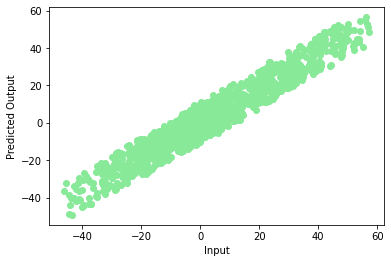

In [89]:
plt.scatter(np.squeeze(model.predict_on_batch(training_data['input'])),
            np.squeeze(training_data['target']),
            c='#88e999')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.show()